<a href="https://colab.research.google.com/github/swathysathesh/FACE-MASK-DETECTION/blob/main/face_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask Detection

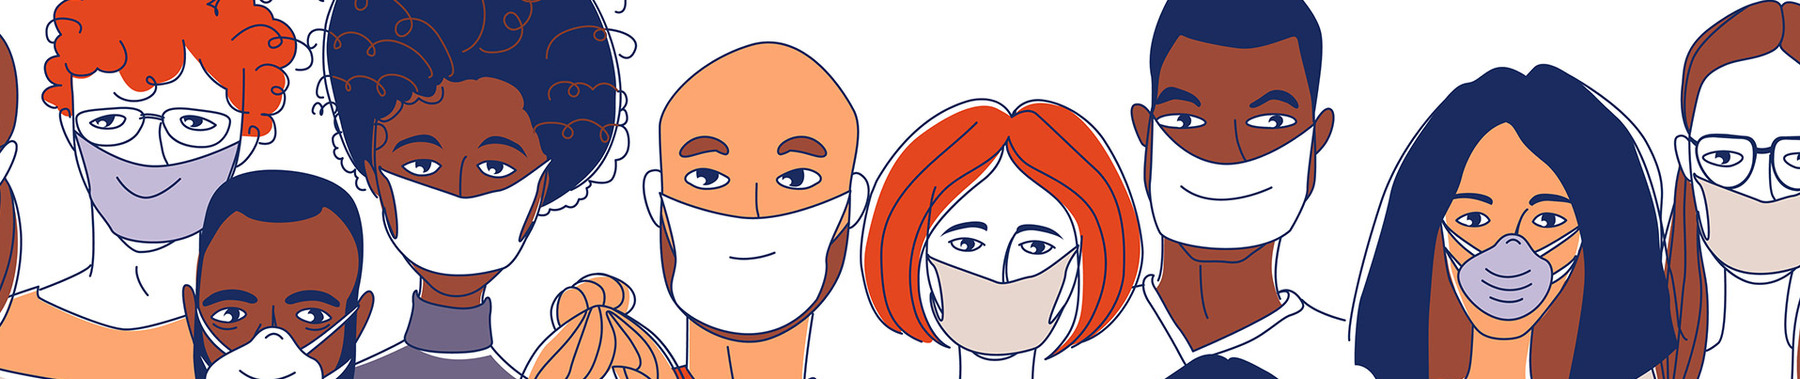

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize

In [ ]:
os.listdir('/content/drive/MyDrive/Face_Mask_Detection_Dataset_MaskNet')

['With Mask', 'Without Mask']

In [ ]:
len(os.listdir('/content/drive/MyDrive/Face_Mask_Detection_Dataset_MaskNet/With Mask'))

645

In [ ]:
len(os.listdir('/content/drive/MyDrive/Face_Mask_Detection_Dataset_MaskNet/Without Mask'))

750

In [ ]:
with_mask=os.path.join('/content/drive/MyDrive/Face_Mask_Detection_Dataset_MaskNet','With Mask')
for img in os.listdir(with_mask):
  print(img)

B001.jpg
B002.jpg
B003.jpg
B004.jpg
B005.jpg
B006.jpg
B007.jpg
B008.jpg
B009.jpg
B010.jpg
B011.jpg
B012.jpg
B013.jpg
B014.jpg
B015.jpg
B016.jpg
B017.jpg
B018.jpg
B019.jpg
B020.jpg
B021.jpg
B022.jpg
B023.jpg
B024.jpg
B025.jpg
B026.jpg
B027.jpg
B028.jpg
B029.jpg
B030.jpg
B031.jpg
B032.jpg
B033.jpg
B034.jpg
B035.jpg
B036.jpg
B037.jpg
B038.jpg
B039.jpg
B040.jpg
B041.jpg
B042.jpg
B043.jpg
B044.jpg
B045.jpg
B046.jpg
B047.jpg
B048.jpg
B049.jpg
B050.jpg
B051.jpg
B052.jpg
B053.jpg
B054.jpg
B055.jpg
B056.jpg
B057.jpg
B058.jpg
B059.jpg
B060.jpg
B061.jpg
B062.jpg
B063.jpg
B064.jpg
B065.jpg
B066.jpg
B067.jpg
B068.jpg
B069.jpg
B070.jpg
B071.jpg
B072.jpg
B073.jpg
B074.jpg
B075.jpg
B076.jpg
B077.jpg
B078.jpg
B079.jpg
B080.jpg
B081.jpg
B082.jpg
B083.jpg
B084.jpg
B085.jpg
B086.jpg
B087.jpg
B088.jpg
B089.jpg
B090.jpg
B091.jpg
B092.jpg
B093.jpg
B094.jpg
B095.jpg
B096.jpg
B097.jpg
B098.jpg
B099.jpg
B100.jpg
B101.jpg
B102.jpg
B103.jpg
B104.jpg
B105.jpg
B106.jpg
B107.jpg
B108.jpg
B109.jpg
B110.jpg
B111.jpg
B

In [ ]:
without_mask=os.path.join('/content/drive/MyDrive/Face_Mask_Detection_Dataset_MaskNet','Without Mask')
for img in os.listdir(without_mask):
  print(img)

0.jpg
1.jpg
100.jpg
101.jpg
102.jpg
104.jpg
105.jpg
106.jpg
107.jpg
A001.jpg
A002.jpg
A003.jpg
A007.jpg
A008.jpg
A010.jpg
A011.jpg
A012.jpg
A013.jpg
A014.jpg
A017.jpg
A018.jpg
A020.jpg
A021.jpg
A022.jpg
A023.jpg
A027.jpg
A028.jpg
A029.jpg
A030.jpg
A031.jpg
A032.jpg
A033.jpg
A035.jpg
A036.jpg
A037.jpg
A038.jpg
A039.jpg
A040.jpg
A041.jpg
A042.jpg
A043.jpg
A044.jpg
A045.jpg
A046.jpg
A047.jpg
A048.jpg
A049.jpg
A051.jpg
A052.jpg
A053.jpg
A054.jpg
A055.jpg
A056.jpg
A060.jpg
A061.jpg
A062.jpg
A063.jpg
A064.jpg
A065.jpg
A066.jpg
A067.jpg
A068.jpg
A069.jpg
A071.jpg
A074.jpg
A075.jpg
A076.jpg
A079.jpg
A080.jpg
A081.jpg
A082.jpg
A083.jpg
A084.jpg
A085.jpg
A086.jpg
A087.jpg
A088.jpg
A089.jpg
A090.jpg
A091.jpg
a0002.png
a0003.png
a0004.png
a0005.png
a0006.png
a0007.png
a0009.png
a0010.png
a0011.png
a0012.png
a0013.png
a0014.png
a0045.png
a0046.png
a0047.png
a0048.png
a0049.png
a0050.png
a0051.png
a0052.png
a0053.png
a0054.png
a0055.png
a0056.png
b0251.png
b0252.png
b0253.png
b0254.png
b0255.png
b02

In [ ]:
flat_data_arr=[]
target_arr=[]
categories=['With Mask','Without Mask']
datadir='/content/drive/MyDrive/Face_Mask_Detection_Dataset_MaskNet'

In [ ]:
for i in categories:
  print("Loading categories.........")
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_arr=imread(os.path.join(path,img))
    img_resize=resize(img_arr,(150,150,3))
    flat_data_arr.append(img_resize.flatten())
    target_arr.append(categories.index(i))
  print("Loaded completely",i)

Loading categories.........
Loaded completely With Mask
Loading categories.........
Loaded completely Without Mask


In [ ]:
flat_data=np.array(flat_data_arr)
target_data=np.array(target_arr)
df=pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.992157,0.992157,0.984314,0.992157,0.992157,0.984314,0.992157,0.992157,0.984314,0.992157,...,0.158308,0.485136,0.371411,0.206705,0.509853,0.396127,0.231421,0.518662,0.404936,0.240231
1,0.992157,0.992157,0.984314,0.992157,0.992157,0.984314,0.992157,0.992157,0.984314,0.992157,...,0.158308,0.485136,0.371411,0.206705,0.509853,0.396127,0.231421,0.518662,0.404936,0.240231
2,0.629435,0.590219,0.551004,0.617728,0.581414,0.545100,0.621439,0.587976,0.553598,0.635997,...,0.825569,0.911605,0.899840,0.825330,0.935926,0.924161,0.849652,0.871192,0.859428,0.784918
3,0.629435,0.590219,0.551004,0.617728,0.581414,0.545100,0.621439,0.587976,0.553598,0.635997,...,0.825569,0.911605,0.899840,0.825330,0.935926,0.924161,0.849652,0.871192,0.859428,0.784918
4,0.629435,0.590219,0.551004,0.617728,0.581414,0.545100,0.621439,0.587976,0.553598,0.635997,...,0.825569,0.911605,0.899840,0.825330,0.935926,0.924161,0.849652,0.871192,0.859428,0.784918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.086274,0.061776,0.063714,0.086274,0.058823,0.066667,0.086274,0.058824,0.069240,0.091269,...,0.131759,0.422459,0.305781,0.157067,0.475158,0.360416,0.201547,0.541770,0.421124,0.254918
1391,0.095372,0.082638,0.076733,0.093148,0.071659,0.077461,0.091264,0.063814,0.071658,0.085408,...,0.153379,0.410161,0.283755,0.146569,0.464209,0.337700,0.184597,0.524864,0.405041,0.216710
1392,0.092909,0.075525,0.073780,0.084191,0.069670,0.070123,0.071559,0.064730,0.065010,0.075848,...,0.148523,0.382160,0.268207,0.157935,0.390174,0.273748,0.168525,0.409213,0.295726,0.185980
1393,0.080941,0.069129,0.065937,0.067689,0.067635,0.067383,0.068099,0.068098,0.068098,0.069620,...,0.164774,0.465355,0.351458,0.175918,0.520957,0.409416,0.208044,0.586020,0.472296,0.263723


In [ ]:
df['Target']=target_data
df.shape

(1395, 67501)

In [ ]:
x=df.iloc[:,:-1].values
x

array([[0.99215686, 0.99215686, 0.98431373, ..., 0.51866195, 0.40493646,
        0.24023058],
       [0.99215686, 0.99215686, 0.98431373, ..., 0.51866195, 0.40493646,
        0.24023058],
       [0.62943479, 0.59021936, 0.55100394, ..., 0.87119245, 0.85942774,
        0.78491794],
       ...,
       [0.09290895, 0.07552515, 0.07378029, ..., 0.40921257, 0.29572628,
        0.18598026],
       [0.08094118, 0.06912946, 0.06593734, ..., 0.58602042, 0.47229558,
        0.26372266],
       [0.07427002, 0.0664274 , 0.07034871, ..., 0.81959507, 0.70736365,
        0.44372616]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=42)
x_train

array([[0.80812916, 0.73850951, 0.62013359, ..., 0.94117647, 0.9372549 ,
        0.9254902 ],
       [0.81863971, 0.81471762, 0.79118821, ..., 0.30389887, 0.31077238,
        0.29116506],
       [0.96470588, 0.8745098 , 0.5254902 , ..., 0.97969649, 0.97583348,
        0.97558229],
       ...,
       [0.93461525, 0.89762309, 0.81895265, ..., 0.3745323 , 0.38067727,
        0.38755188],
       [0.94901961, 0.94901961, 0.90588235, ..., 0.        , 0.02352941,
        0.10002348],
       [0.46961952, 0.54287451, 0.51667834, ..., 0.52452102, 0.57550194,
        0.5676588 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 0.63158121,  0.52477363,  0.31896123, ...,  1.47345123,
         1.52733136,  1.57955156],
       [ 0.66599452,  0.77651447,  0.9145421 , ..., -0.71895983,
        -0.58589482, -0.5822828 ],
       [ 1.1442397 ,  0.97402802, -0.01056973, ...,  1.60597075,
         1.6574631 ,  1.75026972],
       ...,
       [ 1.04571791,  1.05037893,  1.01121279, ..., -0.47596132,
        -0.35009441, -0.25378825],
       [ 1.0928802 ,  1.2201588 ,  1.31388611, ..., -1.76445594,
        -1.55481149, -1.23370965],
       [-0.47675624, -0.12147415, -0.04125099, ...,  0.04004134,
         0.3070805 ,  0.36003154]])

In [ ]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9874551971326165


**prediction**

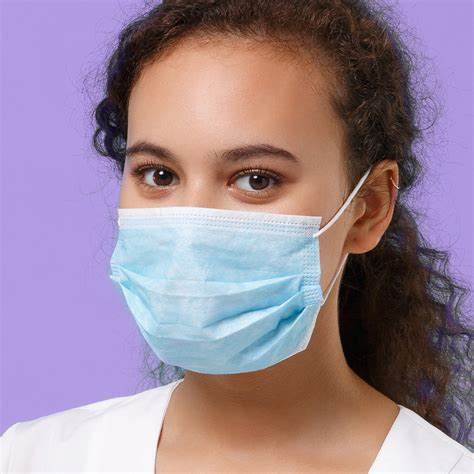

In [ ]:
path1='/content/drive/MyDrive/withmask.jpeg'
img=imread(path1)
img=resize(img,(150,150,3)).flatten().reshape(1,-1)
model.predict(img)

array([0])

this image is withmask